In [11]:
import numpy as np # linear algebra
import pandas as pd # data processing

RANDOM_STATE = 8 


In [12]:
dataset = pd.read_csv('datasetcovid.csv')
df = dataset.iloc[ : , :]
print(df.head())
print(df.shape)
  

        Patient ID  Patient age quantile  Hematocrit  Hemoglobin  Platelets  \
0  126e9dd13932f68                    17    0.236515   -0.022340  -0.517413   
1  8bb9d64f0215244                     1   -1.571682   -0.774212   1.429667   
2  6c9d3323975b082                     9   -0.747693   -0.586244  -0.429480   
3  d3ea751f3db9de9                    11    0.991838    0.792188   0.072992   
4  2c2eae16c12a18a                     9    0.190738   -0.147652  -0.668155   

   Red blood Cells  Lymphocytes  Leukocytes  Basophils  Eosinophils  ...  \
0         0.102004     0.318366   -0.094610  -0.223767     1.482158  ...   
1        -0.850035    -0.005738    0.364550  -0.223767     1.018625  ...   
2        -1.361315    -1.114514   -0.884923   0.081693    -0.666950  ...   
3         0.542763     0.045436   -0.211488  -0.834685    -0.709090  ...   
4        -0.127191     0.002791   -1.132592   0.387152    -0.709090  ...   

   Serum Glucose  Neutrophils      Urea  Proteina C reativa mg/dL  C

In [13]:
dataset

,Patient ID,Patient age quantile,Hematocrit,Hemoglobin,Platelets,Red blood Cells,Lymphocytes,Leukocytes,Basophils,Eosinophils,...,Serum Glucose,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium,Alanine transaminase,Aspartate transaminase,Label
0,126e9dd13932f68,17,0.236515,-0.022340,-0.517413,0.102004,0.318366,-0.094610,-0.223767,1.482158,...,-0.140648,-0.619086,1.198059,-0.147895,2.089928,-0.305787,0.862512,0.000000,0.000000,0
1,8bb9d64f0215244,1,-1.571682,-0.774212,1.429667,-0.850035,-0.005738,0.364550,-0.223767,1.018625,...,-0.413208,-0.127395,-0.067309,-0.286986,-1.838623,0.930020,0.503132,-0.586821,-0.162200,0
2,6c9d3323975b082,9,-0.747693,-0.586244,-0.429480,-1.361315,-1.114514,-0.884923,0.081693,-0.666950,...,0.000000,0.880570,-0.811643,0.000000,-0.908177,0.435697,-0.215628,-0.559257,-0.549287,0
3,d3ea751f3db9de9,11,0.991838,0.792188,0.072992,0.542763,0.045436,-0.211488,-0.834685,-0.709090,...,0.000000,0.265957,0.000000,-0.487674,0.000000,0.000000,0.000000,0.000000,0.000000,0
4,2c2eae16c12a18a,9,0.190738,-0.147652,-0.668155,-0.127191,0.002791,-1.132592,0.387152,-0.709090,...,-0.837191,-0.422410,-1.332677,0.000000,-0.908177,-0.552949,-0.575008,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,c5b44ff9c7782fd,19,0.190738,0.165628,-0.102873,0.384090,-1.583611,-0.328365,-0.834685,0.892207,...,2.433532,1.118221,0.379292,3.627427,0.470262,0.188535,-5.246946,7.930663,7.231172,0
596,88cce1444e16f9c,19,-0.289922,-0.523588,0.663397,0.754327,-1.532437,1.569499,0.081693,-0.540532,...,0.253050,1.134611,-0.067309,5.733660,0.504723,-0.552949,-0.215628,0.000000,0.000000,0
597,2733fac0d3f7138,15,0.717175,1.105468,-0.492289,0.613284,0.002791,-0.550988,-0.223767,-0.709090,...,0.000000,-0.061837,-0.365042,0.561468,-0.494645,0.435697,0.143752,0.874106,1.386150,0
598,acd761fe16b5d0f,17,-3.242548,-2.779203,-1.773594,-3.318285,-1.830953,-1.733675,-1.140144,-0.582671,...,0.041059,1.552548,2.240127,0.609157,0.470262,-0.305787,-1.293767,-0.504127,-0.665414,0


In [14]:
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.impute import SimpleImputer
from sklearn.datasets import make_classification

In [15]:
mat = round(df.cov(),2)
cov_matrix = pd.DataFrame(mat)
cov_matrix

,Patient age quantile,Hematocrit,Hemoglobin,Platelets,Red blood Cells,Lymphocytes,Leukocytes,Basophils,Eosinophils,Monocytes,Serum Glucose,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium,Alanine transaminase,Aspartate transaminase,Label
Patient age quantile,32.74,0.57,0.36,-0.89,-0.20,-0.72,-0.94,0.62,0.14,0.28,0.40,0.40,1.26,0.41,1.45,0.03,-0.06,0.29,0.11,0.29
Hematocrit,0.57,1.01,0.97,-0.09,0.88,0.00,-0.09,0.13,0.03,0.09,-0.05,-0.01,-0.05,-0.20,0.23,0.05,0.07,-0.03,-0.06,0.04
Hemoglobin,0.36,0.97,1.01,-0.12,0.84,-0.00,-0.10,0.12,0.02,0.10,-0.06,-0.02,-0.06,-0.20,0.23,0.03,0.04,-0.02,-0.05,0.04
Platelets,-0.89,-0.09,-0.12,1.00,-0.06,0.09,0.44,-0.03,0.17,-0.20,-0.00,-0.05,-0.01,0.00,-0.13,0.13,0.03,-0.03,-0.06,-0.09
Red blood Cells,-0.20,0.88,0.84,-0.06,1.00,-0.01,-0.04,0.08,-0.01,0.05,-0.01,0.01,-0.09,-0.14,0.15,0.03,0.04,-0.01,-0.03,0.04
Lymphocytes,-0.72,0.00,-0.00,0.09,-0.01,1.00,-0.33,0.24,0.20,0.07,-0.07,-0.73,-0.07,-0.30,-0.12,0.07,0.13,-0.04,-0.05,-0.01
Leukocytes,-0.94,-0.09,-0.10,0.44,-0.04,-0.33,1.00,-0.31,-0.09,-0.29,0.07,0.26,0.08,0.31,-0.04,0.01,-0.03,0.01,0.01,-0.10
Basophils,0.62,0.13,0.12,-0.03,0.08,0.24,-0.31,1.00,0.34,0.10,-0.03,-0.26,-0.01,-0.19,0.06,0.11,0.07,-0.00,-0.02,-0.02
Eosinophils,0.14,0.03,0.02,0.17,-0.01,0.20,-0.09,0.34,1.00,0.01,-0.01,-0.34,0.09,-0.15,0.01,0.06,0.14,0.01,-0.02,-0.06
Monocytes,0.28,0.09,0.10,-0.20,0.05,0.07,-0.29,0.10,0.01,0.99,-0.08,-0.24,-0.04,-0.04,0.08,-0.03,-0.01,-0.02,-0.03,0.06


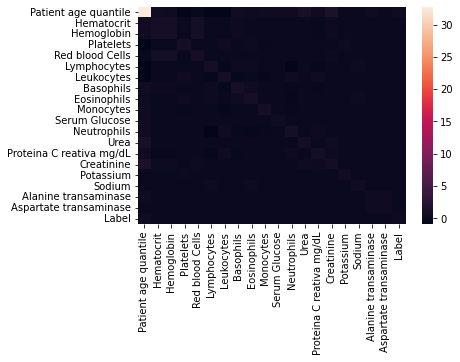

In [16]:
import seaborn as sns

ax = sns.heatmap(cov_matrix)

                          Patient age quantile  Hematocrit  Hemoglobin  \
Patient age quantile                      1.00        0.10        0.06   
Hematocrit                                0.10        1.00        0.97   
Hemoglobin                                0.06        0.97        1.00   
Platelets                                -0.15       -0.08       -0.12   
Red blood Cells                          -0.03        0.87        0.84   
Lymphocytes                              -0.13        0.00       -0.00   
Leukocytes                               -0.16       -0.09       -0.10   
Basophils                                 0.11        0.13        0.12   
Eosinophils                               0.02        0.03        0.02   
Monocytes                                 0.05        0.09        0.10   
Serum Glucose                             0.12       -0.08       -0.09   
Neutrophils                               0.08       -0.02       -0.02   
Urea                                  

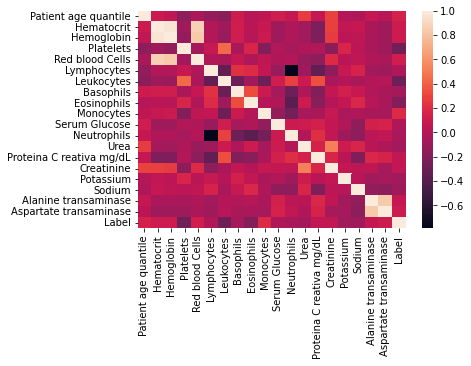

In [17]:
corr_matrix = round(df.corr(),2)
print(corr_matrix)
ax = sns.heatmap(corr_matrix)

In [18]:
print( corr_matrix)

                          Patient age quantile  Hematocrit  Hemoglobin  \
Patient age quantile                      1.00        0.10        0.06   
Hematocrit                                0.10        1.00        0.97   
Hemoglobin                                0.06        0.97        1.00   
Platelets                                -0.15       -0.08       -0.12   
Red blood Cells                          -0.03        0.87        0.84   
Lymphocytes                              -0.13        0.00       -0.00   
Leukocytes                               -0.16       -0.09       -0.10   
Basophils                                 0.11        0.13        0.12   
Eosinophils                               0.02        0.03        0.02   
Monocytes                                 0.05        0.09        0.10   
Serum Glucose                             0.12       -0.08       -0.09   
Neutrophils                               0.08       -0.02       -0.02   
Urea                                  

In [19]:
def get_train_test(dataset, mask_col=None):
        
    # splitting into train and test dataset

    X, y = dataset.iloc[:, 1:-1], dataset.iloc[:, -1]

   

    X, y = pd.DataFrame(X), pd.Series(y).values.ravel()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)
    
    if mask_col:
        X_train, X_test = X_train[mask_col], X_test[mask_col]
    
    

    print("Train Feature: {0}\nTest Feature: {1}\nTrain Target: {2}\nTest Target: {3}\n".format(X_train.shape, X_test.shape, y_train.shape, y_test.shape))
    
    # bringing all of the features into a similar scale

    scaler = preprocessing.StandardScaler()
    scaler.fit_transform(X_train)
    scaler.transform(X_test)

    print(X_test.head())
    
    # imputing missing or invalid values

    my_imputer = SimpleImputer()
    X_train = my_imputer.fit_transform(X_train)
    X_test = my_imputer.transform(X_test)
    print(X_train)
    return X_train, X_test, y_train, y_test, X, y

    

In [20]:
X_train, X_test, y_train, y_test, X, y = get_train_test(df)

Train Feature: (480, 19)
Test Feature: (120, 19)
Train Target: (480,)
Test Target: (120,)

     Patient age quantile  Hematocrit  Hemoglobin  Platelets  Red blood Cells  \
521                     0   -1.182576   -0.836868  -0.153121         0.049113   
107                    19   -0.862136   -0.774212  -2.276066        -1.061599   
50                     18    1.106281    1.168124  -0.781211         0.313568   
371                    18    0.556955    0.729532  -0.291300         0.207786   
194                     3    1.014726    1.042812  -1.208313         1.001153   

     Lymphocytes  Leukocytes  Basophils  Eosinophils  Monocytes  \
521    -1.438617    1.783774  -1.140144    -0.414114  -1.008140   
107     0.096611   -1.828290   1.914447    -0.835508   1.092916   
50      0.173372   -0.717956   0.998070     0.344395   3.246500   
371    -0.850113    0.269936  -0.529226    -0.371974   0.541389   
194    -0.526010   -1.302342  -0.223767    -0.456253   0.515126   

     Serum Glucose 

In [21]:
from sklearn.metrics import confusion_matrix
def evaluate(y_test, y_pred):
    
    acc = round(accuracy_score(y_test, y_pred), 2)
    f1 = round(f1_score(y_test, y_pred), 2)
    prec = precision_score(y_test, y_pred,zero_division=1)
    rec = recall_score(y_test, y_pred,zero_division=1)
    try:    
        roc = round(roc_auc_score(y_test, y_pred), 2)
    except ValueError:
        roc = 'NA'
    # Confusion matrix
    results= confusion_matrix(y_test, y_pred)
    print('Confusion matrix:')
    print(results)
    print("[INFO]: Accuracy: {0}".format(acc))
    print("[INFO]: F1 Score: {0}".format(f1))
    print("[INFO]: Specificity: {0}".format(prec))
    print("[INFO]: Sensitivity: {0}".format(rec))
    print("[INFO]: Area Under ROC Curve: {0}".format(roc))
    print(results)
    print(classification_report(y_test , y_pred),"\n")


In [22]:
for model in [LogisticRegression(random_state=RANDOM_STATE), RandomForestClassifier(random_state=RANDOM_STATE), MLPClassifier(max_iter=1000,random_state=RANDOM_STATE), XGBClassifier(),GradientBoostingClassifier(random_state=RANDOM_STATE),SVC(random_state=RANDOM_STATE)]:
    
    print("[INFO]: Fitting", str(model), "...")
    
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    evaluate(y_test, y_pred)
    print(classification_report(y_test , y_pred),"\n")
  

[INFO]: Fitting LogisticRegression(random_state=8) ...
Confusion matrix:
[[102   4]
 [  6   8]]
[INFO]: Accuracy: 0.92
[INFO]: F1 Score: 0.62
[INFO]: Specificity: 0.6666666666666666
[INFO]: Sensitivity: 0.5714285714285714
[INFO]: Area Under ROC Curve: 0.77
[[102   4]
 [  6   8]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       106
           1       0.67      0.57      0.62        14

    accuracy                           0.92       120
   macro avg       0.81      0.77      0.78       120
weighted avg       0.91      0.92      0.91       120
 

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       106
           1       0.67      0.57      0.62        14

    accuracy                           0.92       120
   macro avg       0.81      0.77      0.78       120
weighted avg       0.91      0.92      0.91       120
 

[INFO]: Fitting RandomForestClassifier(random_state=8) ...
Con

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

In [23]:
!pip install pyswarms


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 104 kB 5.2 MB/s 


In [24]:
import pyswarms as ps

# Define objective function

def f_per_particle(m, alpha):
    
    """Computes for the objective function per particle

    Inputs
    ------
    m : numpy.ndarray
        Binary mask that can be obtained from BinaryPSO, will
        be used to mask features.
    alpha: float (default is 0.5)
        Constant weight for trading-off classifier performance
        and number of features

    Returns
    -------
    numpy.ndarray
        Computed objective function
    """
    total_features = X_train.shape[1]
    
    # Get the subset of the features from the binary mask
    if np.count_nonzero(m) == 0:
        X_train_subset = X_train
        X_test_subset = X_test
    else:
        X_train_subset = X_train[:,m==1]
        X_test_subset = X_test[:,m==1]
        
    # Perform classification and store performance in P
    
    model = SVC(random_state=RANDOM_STATE)
    
    model.fit(X_train_subset, y_train)
    y_pred = model.predict(X_test_subset)
    
    P = f1_score(y_pred, y_test)
    
    # Compute for the objective function
    j = (alpha * (1.0 - P)
        + (1.0 - alpha) * (1 - (X_train_subset.shape[1] / total_features)))

    return j


In [57]:
def f(x, alpha=0.88):
    
    """Higher-level method to do classification in the
    whole swarm.

    Inputs
    ------
    x: numpy.ndarray of shape (n_particles, dimensions)
        The swarm that will perform the search

    Returns
    -------
    numpy.ndarray of shape (n_particles, )
        The computed loss for each particle
        
    """
    n_particles = x.shape[0]
    j = [f_per_particle(x[i], alpha) for i in range(n_particles)]
    
    return np.array(j)

In [58]:
options = {'c1': 1.0, 'c2': 0.5, 'w':0.9, 'k': 30, 'p':2}

# Call instance of PSO

optimizer = ps.discrete.BinaryPSO(n_particles=30, dimensions=X_train.shape[1], options=options)

# Perform optimization

cost, pos_justpso = optimizer.optimize(f, iters=1000, verbose=2)


optimizer.reset()


2022-08-24 03:16:56,116 - pyswarms.discrete.binary - INFO - Optimize for 1000 iters with {'c1': 1.0, 'c2': 0.5, 'w': 0.9, 'k': 30, 'p': 2}
pyswarms.discrete.binary: 100%|██████████|1000/1000, best_cost=0.561
2022-08-24 03:21:44,298 - pyswarms.discrete.binary - INFO - Optimization finished | best cost: 0.5609022556390977, best pos: [1 0 0 1 1 1 0]


In [29]:
X_train, X_test, y_train, y_test, X, y= get_train_test(df)

Train Feature: (480, 19)
Test Feature: (120, 19)
Train Target: (480,)
Test Target: (120,)

     Patient age quantile  Hematocrit  Hemoglobin  Platelets  Red blood Cells  \
521                     0   -1.182576   -0.836868  -0.153121         0.049113   
107                    19   -0.862136   -0.774212  -2.276066        -1.061599   
50                     18    1.106281    1.168124  -0.781211         0.313568   
371                    18    0.556955    0.729532  -0.291300         0.207786   
194                     3    1.014726    1.042812  -1.208313         1.001153   

     Lymphocytes  Leukocytes  Basophils  Eosinophils  Monocytes  \
521    -1.438617    1.783774  -1.140144    -0.414114  -1.008140   
107     0.096611   -1.828290   1.914447    -0.835508   1.092916   
50      0.173372   -0.717956   0.998070     0.344395   3.246500   
371    -0.850113    0.269936  -0.529226    -0.371974   0.541389   
194    -0.526010   -1.302342  -0.223767    -0.456253   0.515126   

     Serum Glucose 

In [30]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, mutual_info_classif

kbest_info_gain = SelectKBest(mutual_info_classif, k=7)
X_train = kbest_info_gain.fit_transform(X_train, y_train)
X_test = kbest_info_gain.transform(X_test)

mask_info_gain = kbest_info_gain.get_support()
features_info_gain = X.columns[mask_info_gain]
print("Information Gain: ", features_info_gain)

# Initialize swarm, arbitrary

options = {'c1': 1.0, 'c2': 0.5, 'w':0.9, 'k': 30, 'p':2}

# Call instance of PSO

optimizer = ps.discrete.BinaryPSO(n_particles=30, dimensions=X_train.shape[1], options=options)

# Perform optimization

cost, pos_info_gain = optimizer.optimize(f, iters=1000, verbose=2)

optimizer.reset()


2022-08-24 02:06:45,143 - pyswarms.discrete.binary - INFO - Optimize for 1000 iters with {'c1': 1.0, 'c2': 0.5, 'w': 0.9, 'k': 30, 'p': 2}


Information Gain:  Index(['Patient age quantile', 'Platelets', 'Leukocytes', 'Basophils',
       'Eosinophils', 'Monocytes', 'Urea'],
      dtype='object')


pyswarms.discrete.binary: 100%|██████████|1000/1000, best_cost=0.88
2022-08-24 02:11:33,758 - pyswarms.discrete.binary - INFO - Optimization finished | best cost: 0.88, best pos: [1 1 1 1 1 1 1]


In [31]:
X_train, X_test, y_train, y_test, X, y = get_train_test(df)


Train Feature: (480, 19)
Test Feature: (120, 19)
Train Target: (480,)
Test Target: (120,)

     Patient age quantile  Hematocrit  Hemoglobin  Platelets  Red blood Cells  \
521                     0   -1.182576   -0.836868  -0.153121         0.049113   
107                    19   -0.862136   -0.774212  -2.276066        -1.061599   
50                     18    1.106281    1.168124  -0.781211         0.313568   
371                    18    0.556955    0.729532  -0.291300         0.207786   
194                     3    1.014726    1.042812  -1.208313         1.001153   

     Lymphocytes  Leukocytes  Basophils  Eosinophils  Monocytes  \
521    -1.438617    1.783774  -1.140144    -0.414114  -1.008140   
107     0.096611   -1.828290   1.914447    -0.835508   1.092916   
50      0.173372   -0.717956   0.998070     0.344395   3.246500   
371    -0.850113    0.269936  -0.529226    -0.371974   0.541389   
194    -0.526010   -1.302342  -0.223767    -0.456253   0.515126   

     Serum Glucose 

In [32]:
# ====== F-score + PSO ========
from sklearn.feature_selection import f_regression
kbest_f_reg = SelectKBest(f_regression, k=6)
print(X_train.shape, X_test.shape)
X_train = kbest_f_reg.fit_transform(X_train, y_train)
X_test = kbest_f_reg.transform(X_test)

mask_f_reg = kbest_f_reg.get_support()
features_f_reg = X.columns[mask_f_reg]
print("F-Regression: ", features_f_reg)

# Initialize swarm, arbitrary

options = {'c1': 1.0, 'c2': 0.5, 'w':0.9, 'k': 30, 'p':2}

# Call instance of PSO

optimizer = ps.discrete.BinaryPSO(n_particles=30, dimensions=X_train.shape[1], options=options)

# Perform optimization

cost, pos_f_reg = optimizer.optimize(f, iters=1000, verbose=2)

optimizer.reset()

2022-08-24 02:11:33,843 - pyswarms.discrete.binary - INFO - Optimize for 1000 iters with {'c1': 1.0, 'c2': 0.5, 'w': 0.9, 'k': 30, 'p': 2}


(480, 19) (120, 19)
F-Regression:  Index(['Platelets', 'Red blood Cells', 'Leukocytes', 'Eosinophils',
       'Monocytes', 'Aspartate transaminase'],
      dtype='object')


pyswarms.discrete.binary: 100%|██████████|1000/1000, best_cost=0.509
2022-08-24 02:16:13,781 - pyswarms.discrete.binary - INFO - Optimization finished | best cost: 0.5094736842105263, best pos: [1 1 1 1 1 1]


In [33]:
columns_just_pso = list()
master_filter_pso = set()
info_gain = set()
f_reg = set()

print("Columns selected with just PSO:\n")

for x, y in zip(X.columns, pos_justpso):
    
    if y == 1:
        print(x)
        columns_just_pso.append(x)
        
print("\nColumns selected with infogain+PSO:\n")

for x, y in zip(X.columns, pos_info_gain):
    
    if y == 1:
        print(x)
        info_gain.add(x)

print("\nColumns selected with f-reg+PSO:\n")

for x, y in zip(X.columns, pos_f_reg):
    
    if y == 1:
        print(x)
        f_reg.add(x)


Columns selected with just PSO:

Hematocrit
Hemoglobin
Platelets
Lymphocytes
Leukocytes
Basophils
Eosinophils
Monocytes
Neutrophils
Urea
Proteina C reativa mg/dL
Creatinine
Potassium
Sodium
Alanine transaminase
Aspartate transaminase

Columns selected with infogain+PSO:

Patient age quantile
Hematocrit
Hemoglobin
Platelets
Red blood Cells
Lymphocytes
Leukocytes

Columns selected with f-reg+PSO:

Patient age quantile
Hematocrit
Hemoglobin
Platelets
Red blood Cells
Lymphocytes


In [34]:
for feature in info_gain.intersection(columns_just_pso):
    master_filter_pso.add(feature)
#for feature in chi2.intersection(f_reg):
    #master_filter_pso.add(feature)
 
for feature in info_gain.intersection(f_reg):
    master_filter_pso.add(feature)
    
print(master_filter_pso)
master_filter_pso = list(master_filter_pso)

{'Hematocrit', 'Lymphocytes', 'Hemoglobin', 'Red blood Cells', 'Leukocytes', 'Platelets', 'Patient age quantile'}


In [35]:
X_train, X_test, y_train, y_test, X, y = get_train_test(df, columns_just_pso)
 
# running the models
 
for model in [LogisticRegression(random_state=RANDOM_STATE), RandomForestClassifier(random_state=RANDOM_STATE), MLPClassifier(random_state=RANDOM_STATE), XGBClassifier(),GradientBoostingClassifier(random_state=RANDOM_STATE),SVC(random_state=RANDOM_STATE)]: 
    
    print("[INFO]: Fitting", str(model), "...")
    
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    evaluate(y_pred, y_test)
    #print(y_pred)
    print(y_test)

Train Feature: (480, 16)
Test Feature: (120, 16)
Train Target: (480,)
Test Target: (120,)

     Hematocrit  Hemoglobin  Platelets  Lymphocytes  Leukocytes  Basophils  \
521   -1.182576   -0.836868  -0.153121    -1.438617    1.783774  -1.140144   
107   -0.862136   -0.774212  -2.276066     0.096611   -1.828290   1.914447   
50     1.106281    1.168124  -0.781211     0.173372   -0.717956   0.998070   
371    0.556955    0.729532  -0.291300    -0.850113    0.269936  -0.529226   
194    1.014726    1.042812  -1.208313    -0.526010   -1.302342  -0.223767   

     Eosinophils  Monocytes  Neutrophils      Urea  Proteina C reativa mg/dL  \
521    -0.414114  -1.008140     0.000000 -0.141742                 -0.386336   
107    -0.835508   1.092916     0.000000 -0.588343                 -0.247246   
50      0.344395   3.246500    -1.192725 -1.183810                 -0.487674   
371    -0.371974   0.541389     0.815012  0.081558                 -0.124051   
194    -0.456253   0.515126     0.446244

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Confusion matrix:
[[101   4]
 [  5  10]]
[INFO]: Accuracy: 0.92
[INFO]: F1 Score: 0.69
[INFO]: Specificity: 0.7142857142857143
[INFO]: Sensitivity: 0.6666666666666666
[INFO]: Area Under ROC Curve: 0.81
[[101   4]
 [  5  10]]
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       105
           1       0.71      0.67      0.69        15

    accuracy                           0.93       120
   macro avg       0.83      0.81      0.82       120
weighted avg       0.92      0.93      0.92       120
 

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1]
[INFO]: Fitting XGBClassifier() ...
Confusion matrix:
[[99  5]
 [ 7  9]]
[INFO]: Accuracy: 0.9
[INFO]: F1 Score: 0.6
[INFO]: Specificity: 0.6428571428571429
[INFO]: Sensitivity: 0.5625
[INFO]: Area Und

In [59]:
# filter +  PSO

X_train, X_test, y_train, y_test, X, y = get_train_test(df, list(master_filter_pso))

# running the models

for model in [LogisticRegression(random_state=RANDOM_STATE), RandomForestClassifier(random_state=RANDOM_STATE), MLPClassifier(random_state=RANDOM_STATE), SVC(random_state=RANDOM_STATE)]:
    
    print("[INFO]: Fitting", str(model), "...")
    
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    cost, pos_f_reg = optimizer.optimize(f, iters=1000, verbose=2)

    
    evaluate(y_pred, y_test)
    print(y_pred)
    print(y_test)
    

2022-08-24 03:29:23,391 - pyswarms.discrete.binary - INFO - Optimize for 1000 iters with {'c1': 1.0, 'c2': 0.5, 'w': 0.9, 'k': 30, 'p': 2}


Train Feature: (480, 7)
Test Feature: (120, 7)
Train Target: (480,)
Test Target: (120,)

     Hematocrit  Lymphocytes  Hemoglobin  Red blood Cells  Leukocytes  \
521   -1.182576    -1.438617   -0.836868         0.049113    1.783774   
107   -0.862136     0.096611   -0.774212        -1.061599   -1.828290   
50     1.106281     0.173372    1.168124         0.313568   -0.717956   
371    0.556955    -0.850113    0.729532         0.207786    0.269936   
194    1.014726    -0.526010    1.042812         1.001153   -1.302342   

     Platelets  Patient age quantile  
521  -0.153121                     0  
107  -2.276066                    19  
50   -0.781211                    18  
371  -0.291300                    18  
194  -1.208313                     3  
[[-2.53300214 -1.86506963 -2.40326715 ...  3.52301908 -1.14550352
  19.        ]
 [-0.03814762  0.41218525 -0.3356202  ...  0.78475189  1.15330768
  15.        ]
 [ 0.69428688 -0.96099097  0.47890773 ... -0.7346524   1.75627458
  14.     

pyswarms.discrete.binary: 100%|██████████|1000/1000, best_cost=0.561
2022-08-24 03:34:22,116 - pyswarms.discrete.binary - INFO - Optimization finished | best cost: 0.5609022556390977, best pos: [1 0 0 1 1 1 0]


Confusion matrix:
[[103  10]
 [  3   4]]
[INFO]: Accuracy: 0.89
[INFO]: F1 Score: 0.38
[INFO]: Specificity: 0.2857142857142857
[INFO]: Sensitivity: 0.5714285714285714
[INFO]: Area Under ROC Curve: 0.74
[[103  10]
 [  3   4]]
              precision    recall  f1-score   support

           0       0.97      0.91      0.94       113
           1       0.29      0.57      0.38         7

    accuracy                           0.89       120
   macro avg       0.63      0.74      0.66       120
weighted avg       0.93      0.89      0.91       120
 

[0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 

2022-08-24 03:34:22,335 - pyswarms.discrete.binary - INFO - Optimize for 1000 iters with {'c1': 1.0, 'c2': 0.5, 'w': 0.9, 'k': 30, 'p': 2}
pyswarms.discrete.binary: 100%|██████████|1000/1000, best_cost=0.561
2022-08-24 03:39:13,936 - pyswarms.discrete.binary - INFO - Optimization finished | best cost: 0.5609022556390977, best pos: [1 0 0 1 1 1 0]


Confusion matrix:
[[101  10]
 [  5   4]]
[INFO]: Accuracy: 0.88
[INFO]: F1 Score: 0.35
[INFO]: Specificity: 0.2857142857142857
[INFO]: Sensitivity: 0.4444444444444444
[INFO]: Area Under ROC Curve: 0.68
[[101  10]
 [  5   4]]
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       111
           1       0.29      0.44      0.35         9

    accuracy                           0.88       120
   macro avg       0.62      0.68      0.64       120
weighted avg       0.90      0.88      0.89       120
 

[0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
2022-08-24 03:39:15,539 - pyswarms.discrete.binary - INFO - Optimize for 1000 iters with {'c1': 1.0, 'c2': 0.5, 'w': 0.9, 'k': 30, 'p': 2}
pyswarms.discrete.binary: 100%|██████████|1000/1000, best_cost=0.561
2022-08-24 03:44:07,835 - pyswarms.discrete.binary - INFO - Optimization finished | best cost: 0.5609022556390977, best pos: [1 0 0 1 1 1 0]
2022-08-24 03:44:07,878 - pyswarms.discrete.binary - INFO - Optimize for 1000 iters with {'c1': 1.0, 'c2': 0.5, 'w': 0.9, 'k': 30, 'p': 2}


Confusion matrix:
[[103   5]
 [  3   9]]
[INFO]: Accuracy: 0.93
[INFO]: F1 Score: 0.69
[INFO]: Specificity: 0.6428571428571429
[INFO]: Sensitivity: 0.75
[INFO]: Area Under ROC Curve: 0.85
[[103   5]
 [  3   9]]
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       108
           1       0.64      0.75      0.69        12

    accuracy                           0.93       120
   macro avg       0.81      0.85      0.83       120
weighted avg       0.94      0.93      0.94       120
 

[0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 

pyswarms.discrete.binary: 100%|██████████|1000/1000, best_cost=0.561
2022-08-24 03:49:00,612 - pyswarms.discrete.binary - INFO - Optimization finished | best cost: 0.5609022556390977, best pos: [1 0 0 1 1 1 0]


Confusion matrix:
[[106  14]
 [  0   0]]
[INFO]: Accuracy: 0.88
[INFO]: F1 Score: 0.0
[INFO]: Specificity: 0.0
[INFO]: Sensitivity: 1.0
[INFO]: Area Under ROC Curve: NA
[[106  14]
 [  0   0]]
              precision    recall  f1-score   support

           0       1.00      0.88      0.94       120
           1       0.00      0.00      0.00         0

    accuracy                           0.88       120
   macro avg       0.50      0.44      0.47       120
weighted avg       1.00      0.88      0.94       120
 

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [37]:
!pip install scikit-learn==1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 23.1 MB 54.4 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2


In [38]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [39]:
dataset = pd.read_csv('datasetcovid.csv')
X = dataset.iloc[:, 1:-1]
y = dataset.iloc[:, -1]

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [41]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [43]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 15)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [44]:
np.asmatrix(pca.get_covariance())

matrix([[ 1.00204445e+00,  7.51032660e-02,  4.43026667e-02,
         -1.50665252e-01, -6.09595441e-02, -1.31220664e-01,
         -1.73136880e-01,  1.20877640e-01,  2.11677707e-02,
          2.72759975e-02,  1.34459298e-01,  5.08136033e-02,
          2.65286998e-01,  1.04828520e-01,  3.03048638e-01,
          1.27761048e-02,  1.71536368e-02,  4.68522981e-02,
          8.61350084e-03],
        [ 7.51032660e-02,  1.05891520e+00,  9.15983378e-01,
         -7.44946071e-02,  8.69766318e-01,  1.38434915e-02,
         -9.28119586e-02,  1.47330480e-01,  2.43297847e-02,
          8.65054837e-02, -9.62953927e-02, -4.47396035e-02,
         -8.15953420e-02, -2.22859799e-01,  2.80716302e-01,
          9.23724303e-02,  1.66506322e-02, -4.41626423e-02,
         -1.13637925e-01],
        [ 4.43026667e-02,  9.15983378e-01,  1.03819485e+00,
         -1.04587303e-01,  8.64241731e-01,  9.38799109e-03,
         -9.82948249e-02,  1.35838477e-01,  1.22503159e-02,
          9.29074306e-02, -8.94673186e-02, -4.

In [45]:
X_train

array([[ 1.58757202e+00, -7.05428378e-01, -8.36583289e-01, ...,
         1.62399011e-01,  1.37531285e-01, -1.42578172e-01],
       [ 5.27946777e+00, -4.18420991e+00, -9.42417185e-01, ...,
        -1.49041128e+00,  8.12033955e-04,  3.78296440e-01],
       [-8.27409584e-01,  7.27554118e-01, -1.36325340e+00, ...,
        -3.50629329e-01,  3.30543647e-01,  1.90720510e-01],
       ...,
       [ 1.13501792e+00,  2.64657379e+00,  8.66481747e-01, ...,
         5.14812599e-04,  3.84510017e-01,  1.28515875e+00],
       [-2.44723478e-01, -1.33683988e+00, -1.76408702e+00, ...,
         4.71858657e-01, -8.31100487e-01,  1.83736392e+00],
       [ 2.23534057e+00,  6.48992708e-01, -1.93303430e+00, ...,
         7.29492871e-04,  3.51550971e-01, -3.25556564e-01]])

In [46]:
for model in [LogisticRegression(random_state=RANDOM_STATE), RandomForestClassifier(random_state=RANDOM_STATE), MLPClassifier(random_state=RANDOM_STATE), SVC(random_state=RANDOM_STATE)]:
    
    print("[INFO]: Fitting", str(model), "...")
    
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    evaluate(y_pred, y_test)

[INFO]: Fitting LogisticRegression(random_state=8) ...
Confusion matrix:
[[101  10]
 [  3   6]]
[INFO]: Accuracy: 0.89
[INFO]: F1 Score: 0.48
[INFO]: Specificity: 0.375
[INFO]: Sensitivity: 0.6666666666666666
[INFO]: Area Under ROC Curve: 0.79
[[101  10]
 [  3   6]]
              precision    recall  f1-score   support

           0       0.97      0.91      0.94       111
           1       0.38      0.67      0.48         9

    accuracy                           0.89       120
   macro avg       0.67      0.79      0.71       120
weighted avg       0.93      0.89      0.91       120
 

[INFO]: Fitting RandomForestClassifier(random_state=8) ...
Confusion matrix:
[[102  14]
 [  2   2]]
[INFO]: Accuracy: 0.87
[INFO]: F1 Score: 0.2
[INFO]: Specificity: 0.125
[INFO]: Sensitivity: 0.5
[INFO]: Area Under ROC Curve: 0.69
[[102  14]
 [  2   2]]
              precision    recall  f1-score   support

           0       0.98      0.88      0.93       116
           1       0.12      0.50      0

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
